## Data

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from nltk.corpus import stopwords

matplotlib.rcParams['figure.figsize'] = (15, 10)


**Conditions**
1. Books greater then 300 words.
2. Hebrew books.
3. Each book divided into 100 words chunks.

So we have 202 scrolls that match our criteria (with 39 compositions).
Only 129 scrolls have composition label.

In [248]:
DATA_PATH = "data/filtered_text_and_starr_features_22_05_2024.csv"
df = pd.read_csv(DATA_PATH)
df_grouped = df.groupby("book")["text"].apply(' '.join).reset_index()
book_info = df[["book", "composition", "section"]].drop_duplicates()
df_by_book = pd.merge(df_grouped, book_info, on="book", how="inner")

df


,book,sentence_path,text_lex,text,n_words_lex,n_words,construct to absolute nouns ratio,construct nouns and adjectives percentage,noun to verb ratio,definite_article_percentage,...,aCr percentage,oM percentage,kya percentage,all conjunctions percentage,non-finite to finite verbs ratio,passive verb forms percentage,total word count,section,scroll,composition
0,CD,CD:1:1-1:12,שמע כל ידע צדק בין מעה אל ריב ל כל בר משפט עה ...,ועתה שמעו כל יודעי צדק ובינו במעשי אל כי ריב ל...,82,92,0.666667,0.110092,2.250000,0.917431,...,0.0,0.0,0.0,21.100917,0.333333,0.000000,109.0,sectarian_texts,CD,CD
1,CD,CD:1:12-2:1,אחרון עה דור אחרון עדה בגד הם סור דרך היא עת ה...,אחרונים את אשר עשה בדור אחרון בעדת בוגדים הם ס...,85,96,0.545455,0.114286,1.241379,4.761905,...,0.0,0.0,0.0,14.285714,0.705882,0.000000,105.0,sectarian_texts,CD,CD
2,CD,CD:2:1-2:10,כל המון מעה נדה פנה שמע אל כל בוא ברית גלה אזן...,את כל המונם ומעשיהם לנדה לפניו ועתה שמעו אלי כ...,79,94,0.481481,0.130841,2.222222,0.934579,...,0.0,0.0,0.0,17.757009,0.800000,1.869159,107.0,sectarian_texts,CD,CD
3,CD,CD:2:10-2:20,כל שנה עולם כל קום ל קריא שם יתר פליטה ארץ מלא...,לכל שני עולם ובכולם הקים לו קריאי שם למען התיר...,79,94,1.250000,0.205607,1.714286,0.934579,...,0.0,0.0,0.0,17.757009,0.615385,1.869159,107.0,sectarian_texts,CD,CD
4,CD,CD:2:20-3:8,בר היה חרבה גוע היה היה עה רצון שמר מצוה עה חר...,בשר אשר היה בחרבה כי גוע ויהיו כלא היו בעשותם ...,81,95,1.100000,0.103774,1.000000,1.886792,...,0.0,0.0,0.0,18.867925,0.217391,6.603774,106.0,sectarian_texts,CD,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,Mas1e,Mas1e:1:26-2:11,שלח שררות לב הלך מועצה עם שמע ל יראל דרך הלך מ...,ואשלחהו בשררות לבם ילכו במועצותיהם לו עמי שמע ...,81,89,-1.000000,0.089286,1.260870,2.678571,...,0.0,0.0,0.0,10.714286,0.210526,1.785714,112.0,NaN,NaN,NaN
2987,Mas1e,Mas1e:2:12-2:25,אתה נחל כל גוי שיר מזמור אסף אלהים דמי ל חרש ש...,כי אתה תנחל בכל הגוים שיר מזמור לאסף אלהים אל ...,74,89,-1.000000,0.053571,2.529412,1.785714,...,0.0,0.0,0.0,13.392857,0.062500,3.571429,112.0,NaN,NaN,NaN
2988,Mas1e,Mas1e:2:25-3:11,נסיך אמר ירש ל נוה אלהים אלהים שית גלגל קש פנה...,נסיכמו אשר אמרו נירשה לנו את נאות אלהים אלהים ...,76,89,1.666667,0.044643,1.777778,3.571429,...,0.0,0.0,0.0,12.500000,0.125000,1.785714,112.0,NaN,NaN,NaN
2989,Mas1e,Mas1e:3:11-3:26,בית הלל אדם עז ל ב מסלה לבב עבר עמק בכא מעין ש...,ביתך עוד יהללוך סלה אשרי אדם עוז לו בך מסלות ב...,79,90,4.000000,0.072072,2.166667,2.702703,...,0.0,0.0,0.0,5.405405,0.500000,0.900901,111.0,NaN,NaN,NaN


## Analysis

In [249]:
df_by_book["number_of_chars"] = df_by_book['text'].str.len()
df_by_book["number_of_words"] = df_by_book['text'].str.split().map(lambda x: len(x))
df_by_book["avg_word_length"] = df_by_book['text'].str.split().apply(lambda x: [len(i) for i in x]).map(
    lambda x: np.mean(x))


Books with the highest avg word length:

In [23]:
df_by_book.sort_values(by="avg_word_length", ascending=False)[["book", "avg_word_length"]].head(15)


,book,avg_word_length
406,4Q321a,4.864971
404,4Q320,4.852113
405,4Q321,4.847656
89,1QM,4.426585
503,4Q394,4.419028
657,4Q491,4.369184
514,4Q403,4.360927
506,4Q397,4.326291
21,11Q5,4.263258
545,4Q429,4.255000


In [24]:
df_by_book[df_by_book["book"] == "4Q321a"]["text"].to_list()

[' השנה הראשונה בארבעה בגמול באחד בראשון בחמשה בידעיה בשלושים בוא השנית ודוקו בששה במעוזיה בשבעה עשר בוא שבת בקוץ בשלושים בשני ודוקו באחד במלכיה בשבעה עשר בוא באחד באלישיב בתשעה ועשרים בשלישי ודוקו בשנים בישוע בששה עשר בוא בשלושה בבלגא בשמונה ועשרים ברביעי ודוקו בארבעה בחופה בחמשה עשר בוא בארבעה בפתחיה בשבעה ועשרים בחמישי ודוקו בחמשה בחזיר בארבעה עשר בוא בששה בדליה בשבעה ועשרים בששי ודוקו שבת בגמול בארבעה עשר בוא שבת בשעורים בחמשה ועשרים בשביעי ודוקו באחד בידעיה בשנים עשר בוא בשנים באביה בחמשה ועשרים בשמיני ודוקו בשלושה במימין  בשנים עשר בוא בשלושה ביקים בארבעה ועשרים בתשיעי ודוקו בארבעה בשכניה באחד עשר בוא בחמשה באמר בשלושה ועשרים בעשירי ודוקו בששה בישבאב בעשרה בוא בששה ביחזקאל בשנים ועשרים בעשתי עשר החודש ודוקו שבת בפתחיה בתשעה בוא באחד ביויריב בשנים ועשרים בשנים עשר החודש ודוקו בשנים בדליה בתשעה בוא השנית החודש הראשון בשנים במלכיה בעשרים בוא ודוקו בשלושה בחרים בשבעה בוא בארבעה בישוע בעשרים בשני ודוקו בחמשה בקוץ בשבעה בוא בחמשה בחופה בתשעה עשר בשלישי ודוקו בששה באלישיב בששה בוא שבת ב

Text(0.5, 1.0, 'Average word length')

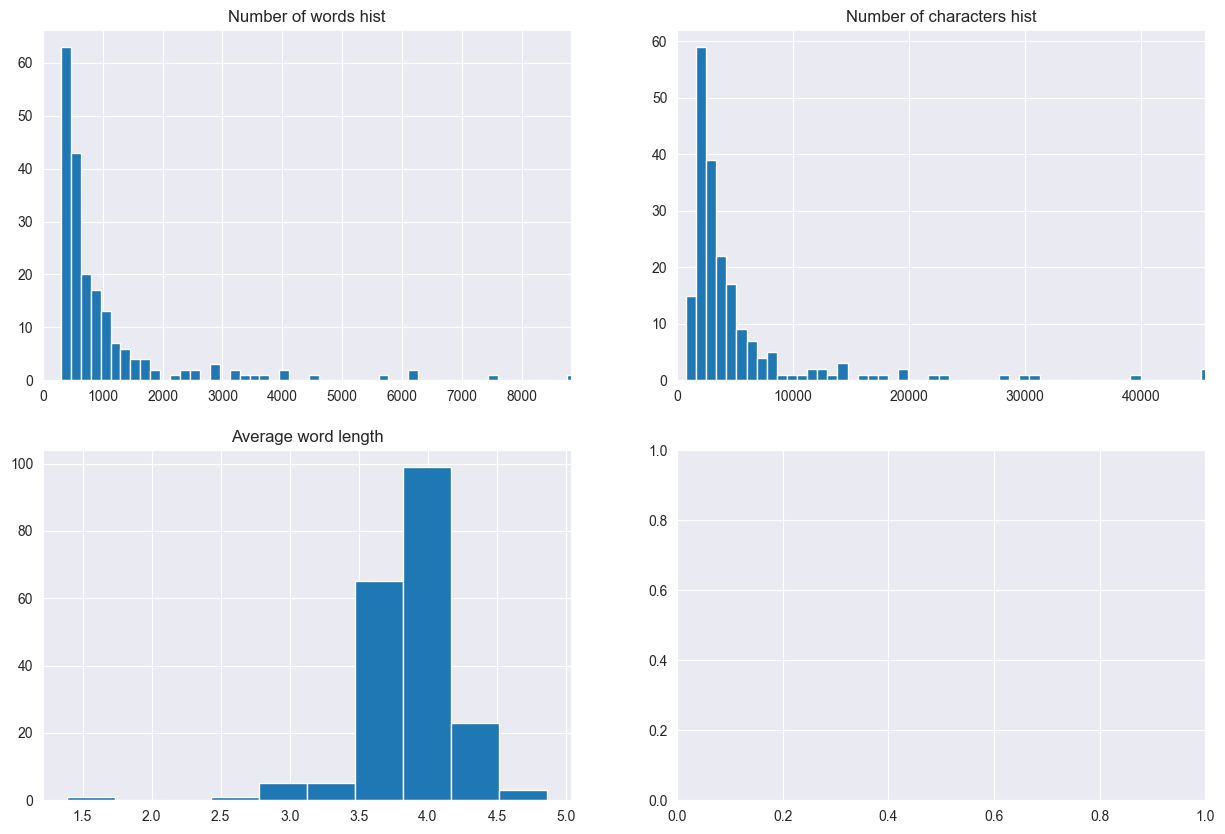

In [25]:
fig, ax = plt.subplots(2, 2)
df_by_book["number_of_words"].hist(ax=ax[0, 0], bins=100)
df_by_book["number_of_chars"].hist(ax=ax[0, 1], bins=100)
ax[0, 0].set_xlim(0, df_by_book["number_of_words"].quantile(0.99))
ax[0, 1].set_xlim(0, df_by_book["number_of_chars"].quantile(0.99))
df_by_book["avg_word_length"].hist(ax=ax[1, 0])
ax[0, 0].set_title("Number of words hist")
ax[0, 1].set_title("Number of characters hist")
ax[1, 0].set_title("Average word length")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yonatanlou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Top 20 stop words in corpus')

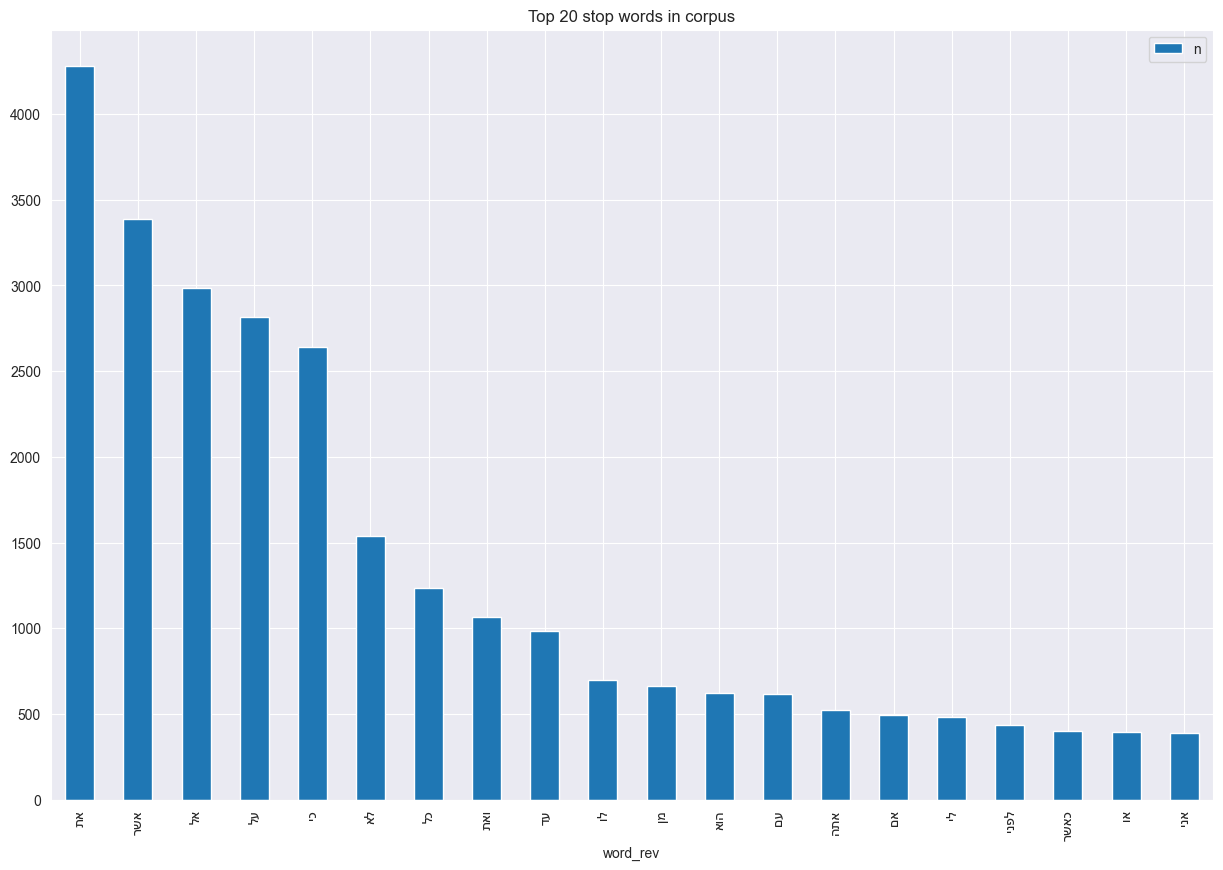

In [26]:
from collections import defaultdict

nltk.download('stopwords')
stop_words = set(stopwords.words('hebrew'))
corpus = []
words = df_by_book["text"].str.split()
words = words.values.tolist()
corpus = [word for i in words for word in i]

dic = defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word] += 1
stop_words_dist = pd.DataFrame([dic]).T.reset_index().rename(columns={0: "n", "index": "word"})
stop_words_dist["word_rev"] = stop_words_dist["word"].str[::-1]
stop_words_dist = stop_words_dist.set_index("word_rev")
stop_words_dist.sort_values(by="n", ascending=False).head(20).plot(kind="bar")
plt.title("Top 20 stop words in corpus")

<Axes: >

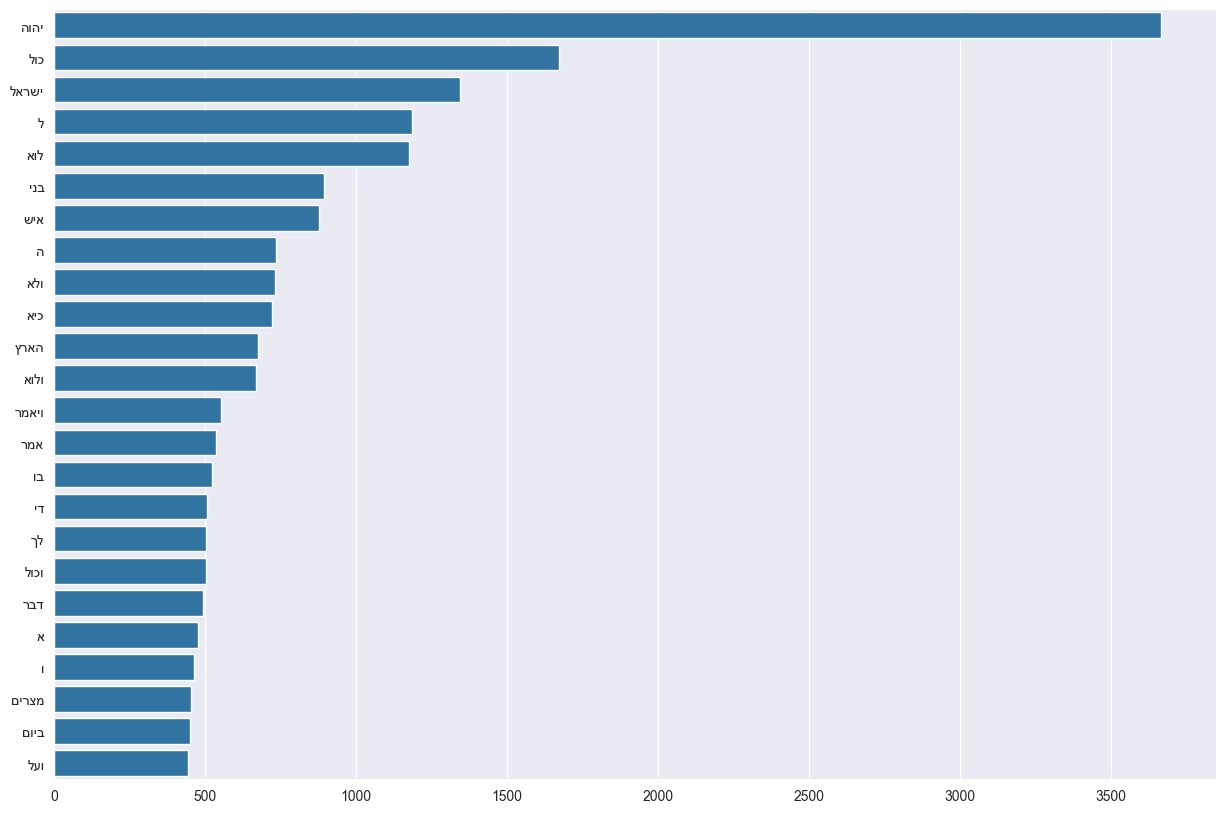

In [27]:
from collections import Counter

corpus = []
words = df_by_book["text"].str.split()
words = words.values.tolist()
corpus = [word for i in words for word in i]
corpus_no_punc = [word for word in corpus if word != "."]
counter = Counter(corpus_no_punc)
most = counter.most_common()

import seaborn as sns

x, y = [], []
for word, count in most[:40]:
    if (word not in stop_words):
        x.append(word[::-1])
        y.append(count)

sns.barplot(x=y, y=x)

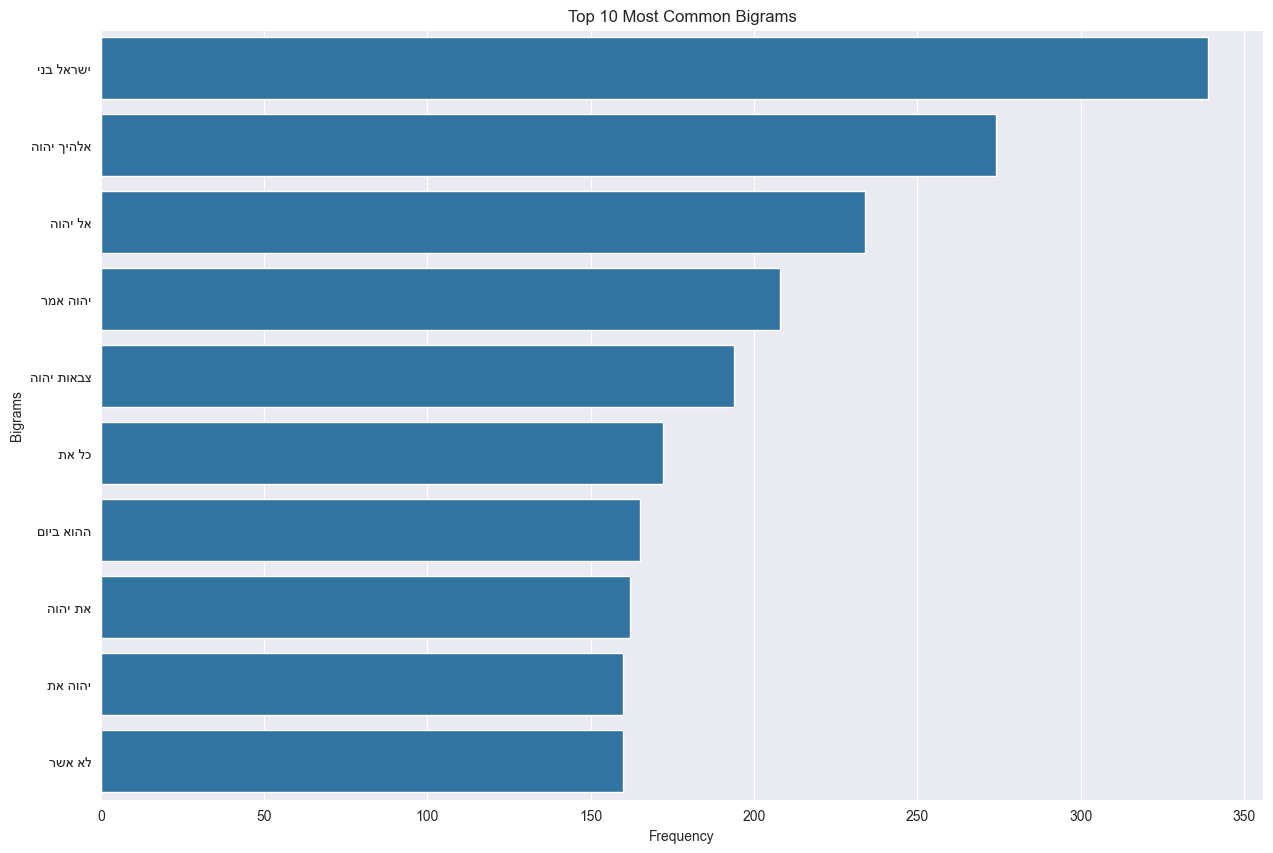

In [28]:
from nltk.util import ngrams
from collections import Counter


def most_common_ngram(words, n=2):
    # Tokenize the corpus into words

    # Generate n-grams
    n_grams = ngrams(words, n)

    # Count and find the most common n-gram
    ngram_freq = Counter(n_grams)
    most_common = ngram_freq.most_common()  # Returns the most common n-gram and its frequency
    return most_common


corpus_no_punc_rev = [word[::-1] for word in corpus if word != "."]


def plot_ngram(words, k, n):
    top_n_bigrams = most_common_ngram(words, k)[:n]
    bigrams, counts = map(list, zip(*top_n_bigrams))
    bigrams = [' '.join(bigram) for bigram in bigrams]  # Convert tuple to string for better readability on plot

    sns.barplot(x=counts, y=bigrams)
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.title('Top 10 Most Common Bigrams')
    plt.show()


plot_ngram(corpus_no_punc_rev, 2, 10)


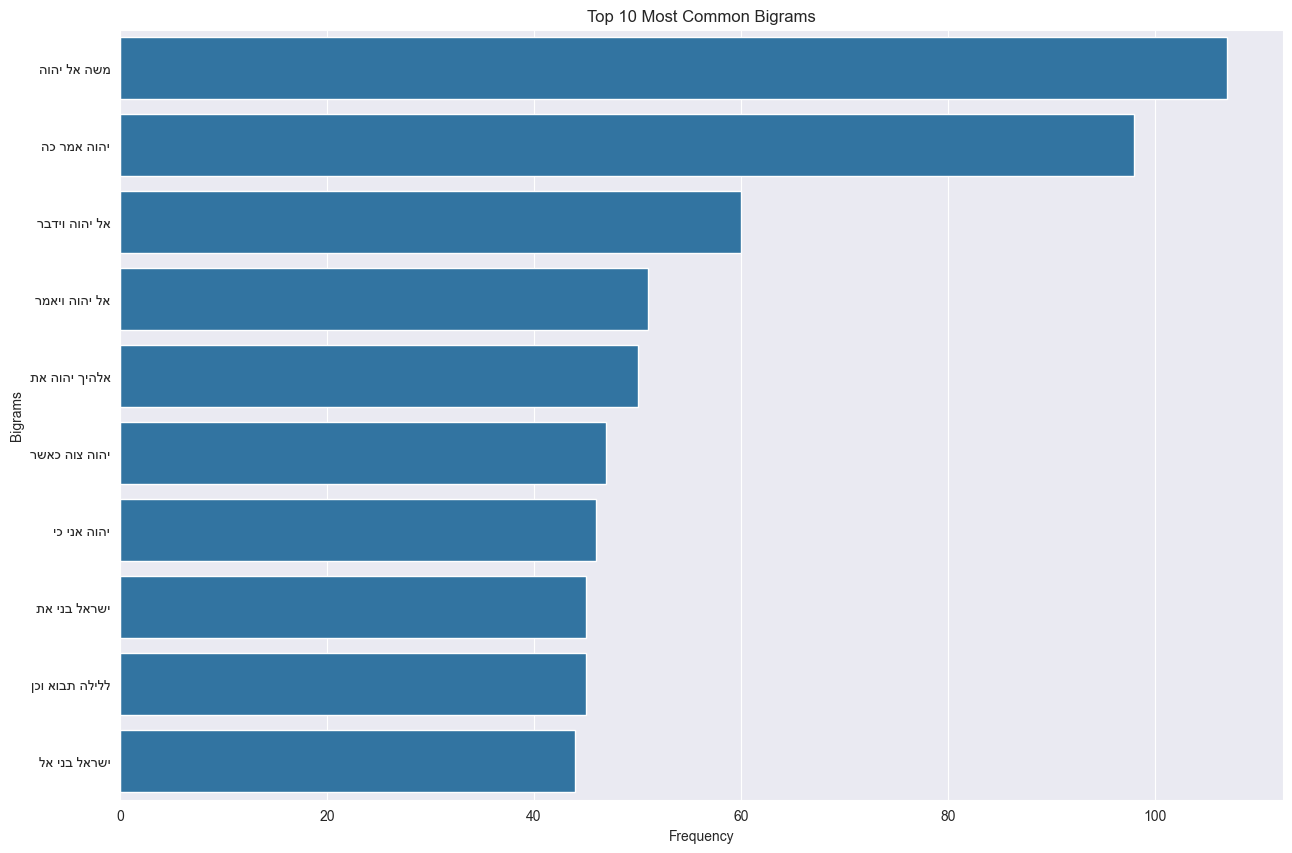

In [29]:
plot_ngram(corpus_no_punc_rev, 3, 10)